In [1]:
from PIL import Image

In [2]:
import numpy as np

### chair의 이미지 해상도 통일하여 적용하기 Test

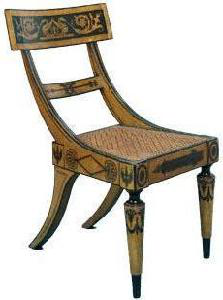

In [3]:
# Image 불러오기
img = Image.open('../data/cnn/chair/image_0001.jpg')
img

In [4]:
# 배열 확인
np.array(img).shape

(300, 223, 3)

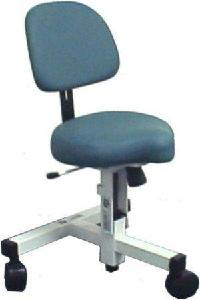

In [5]:
# Image 불러오기
img = Image.open('../data/cnn/chair/image_0002.jpg')
img

In [6]:
# 배열 확인
np.array(img).shape

(300, 200, 3)

> 이미지 가로가 좀 다르구나

In [7]:
# 너비 해상도 구하기
np.array(img).shape[1]

200

> 0,1 번을 수정하여 해상도를 통일해야겠다!!

---
### chair 전체 이미지의 해상도 평균 구하기

In [8]:
import glob

In [9]:
widthRatio = []
heightRatio = []

for file in sorted(glob.glob('../data/cnn/chair/*.jpg')):
    img = np.array(Image.open(file), dtype=np.int32)
    widthRatio.append(img.shape[1])
    heightRatio.append(img.shape[0])

print('chair의 너비 평균해상도 :', np.mean(widthRatio), '최대 너비', np.max(widthRatio))
print('chair의 높이 평균해상도 :', np.mean(heightRatio), '최대 높이', np.max(heightRatio))

chair의 너비 평균해상도 : 230.69354838709677 최대 너비 300
chair의 높이 평균해상도 : 296.98387096774195 최대 높이 300


In [10]:
# 개수 확인
len(widthRatio) == len(heightRatio)

True

> 평균 너비 231, 높이 297   
> 이 방법의 문제점 : resizing은 이미지를 훼손한다.

---
### Chair의 이미지 해상도 변경 및 cmap Gray Scale로 바꾸기

In [11]:
# Chair의 파일 개수(62개)와 laptop의 파일개수(82개)를 60개로 맞추기
i = 0 # 파일 개수 카운드
for file in sorted(glob.glob('../data/cnn/chair/*.jpg')):
    img = Image.open(file)
    # imgResize = img.resize((231, 297), Image.LANCZOS)
    imgNew = img.convert('L') # GrayScale, 투명도가 있다면 LA로 진행
    imgNew.save('../data/cnn/chairNew/image_%04d.jpg'%(i+1), 'JPEG')
    i+=1
    if i >= 60:
        break

---
### Laptop의 이미지 해상도 변경 및 Gray Scale로 적용하기

In [12]:
widthRatio = []
heightRatio = []

for file in sorted(glob.glob('../data/cnn/laptop/*.jpg')):
    img = np.array(Image.open(file), dtype=np.int32)
    widthRatio.append(img.shape[1])
    heightRatio.append(img.shape[0])

print('chair의 너비 평균해상도 :', np.mean(widthRatio), '최대 너비 :', np.max(widthRatio))
print('chair의 높이 평균해상도 :', np.mean(heightRatio), '최대 높이 :', np.max(heightRatio))

chair의 너비 평균해상도 : 293.2345679012346 최대 너비 : 300
chair의 높이 평균해상도 : 267.5925925925926 최대 높이 : 300


> 이지만 사이즈 통일시키기 > 여백을 두고 가운데로 모으자

In [13]:
# Chair의 파일 개수(62개)와 laptop의 파일개수(82개)를 모두 60개로 맞추기
i = 0 # 파일 개수 카운드
for file in sorted(glob.glob('../data/cnn/laptop/*.jpg')):
    img = Image.open(file)
    # imgResize = img.resize((231, 297), Image.LANCZOS)
    imgNew = img.convert('L') # GrayScale, 투명도가 있다면 LA로 진행
    imgNew.save('../data/cnn/laptopNew/image_%04d.jpg'%(i+1), 'JPEG')
    i+=1
    if i >= 60:
        break

---
### chair image를 numpy로 변경하기

In [14]:
number_of_data = 60
img_width_size = 350
img_height_size = 350

In [15]:
# 비어있는 array 만들기
chairData = np.zeros(number_of_data*img_width_size*img_height_size, dtype=np.int32).reshape(number_of_data, img_height_size, img_width_size)
chairData.shape

(60, 350, 350)

In [16]:
350//2

175

In [17]:
i = 0
for file in sorted(glob.glob('../data/cnn/chairNew/*.jpg')):
    img = np.array(Image.open(file), dtype=np.int32)
    x=0
    for a in range((350//2 - int(img.shape[0]/2)), (350//2 + int(img.shape[0]/2))):
        y=0
        for b in range((350//2 - int(img.shape[1]/2)), (350//2 + int(img.shape[1]/2))):
            chairData[i,a,b] = img[x,y]
            y+=1
        x+=1
    i+=1

In [18]:
# 이미지 확인
import matplotlib.pyplot as plt

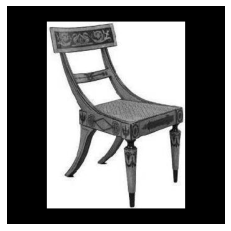

In [19]:
plt.imshow(chairData[0], cmap='gray')
plt.axis('off')
plt.show()

---
### laptop image를 numpy array로 변경하기

In [20]:
# 비어있는 array 만들기
laptopData = np.zeros(number_of_data*img_width_size*img_height_size, dtype=np.int32).reshape(number_of_data, img_height_size, img_width_size)
laptopData.shape

(60, 350, 350)

In [21]:
i = 0
for file in sorted(glob.glob('../data/cnn/laptopNew/*.jpg')):
    img = np.array(Image.open(file), dtype=np.int32)
    x=0
    for a in range((350//2 - int(img.shape[0]/2)), (350//2 + int(img.shape[0]/2))):
        y=0
        for b in range((350//2 - int(img.shape[1]/2)), (350//2 + int(img.shape[1]/2))):
            laptopData[i,a,b] = img[x,y]
            y+=1
        x+=1
    i+=1

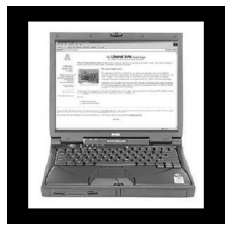

In [22]:
plt.imshow(laptopData[59], cmap='gray')
plt.axis('off')
plt.show()

---
### piano 추가

In [23]:
# 비어있는 array 만들기
pianoData = np.zeros(number_of_data*img_width_size*img_height_size, dtype=np.int32).reshape(number_of_data, img_height_size, img_width_size)
pianoData.shape

(60, 350, 350)

In [24]:
i = 0 # 파일 개수 카운드
for file in sorted(glob.glob('../data/cnn/piano/*.jpg')):
    img = Image.open(file)
    imgNew = img.convert('L') # GrayScale, 투명도가 있다면 LA로 진행
    imgNew.save('../data/cnn/pianoNew/image_%04d.jpg'%(i+1), 'JPEG')
    i+=1
    if i >= 60:
        break

In [25]:
i = 0
for file in sorted(glob.glob('../data/cnn/pianoNew/*.jpg')):
    img = np.array(Image.open(file), dtype=np.int32)
    x=0
    for a in range((350//2 - int(img.shape[0]/2)), (350//2 + int(img.shape[0]/2))):
        y=0
        for b in range((350//2 - int(img.shape[1]/2)), (350//2 + int(img.shape[1]/2))):
            pianoData[i,a,b] = img[x,y]
            y+=1
        x+=1
    i+=1

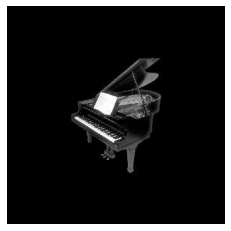

In [26]:
plt.imshow(pianoData[0], cmap='gray')
plt.axis('off')
plt.show()

---
### numpy data를 train data로 합치기

In [27]:
train = np.concatenate([chairData, laptopData, pianoData]) / 255.0
train.shape

(180, 350, 350)

### target data 만들기

In [28]:
target = np.concatenate([np.zeros(60), np.ones(60), np.full(60,2)])

In [29]:
target.shape

(180,)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Train, Test
train_input, test_input, train_target, test_target = train_test_split(
    train, target, test_size=0.2, random_state=42
)

In [32]:
train_input

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [33]:
# train, val
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [34]:
train_input.shape, train_target.shape, val_input.shape, val_target.shape

((115, 350, 350), (115,), (29, 350, 350), (29,))

---
### model 

In [35]:
from tensorflow import keras

In [36]:
model = keras.Sequential()

2022-07-22 12:47:40.406686: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
model.add(
    keras.layers.Conv2D(
        76, kernel_size=3, activation='relu', padding='same', input_shape=(img_height_size, img_width_size,1)
    )
)

In [38]:
model.add(
    keras.layers.MaxPooling2D(2)
)

In [39]:
model.add(
    keras.layers.Conv2D(
        152, kernel_size=3, activation='relu', padding='same'
    )
)

In [40]:
model.add(
    keras.layers.MaxPooling2D(2)
)

In [41]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.7))
model.add(keras.layers.Dense(3, activation='softmax'))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 350, 350, 76)      760       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 175, 175, 76)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 175, 175, 152)     104120    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 87, 87, 152)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1150488)           0         
                                                                 
 dense (Dense)               (None, 100)               1

In [43]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

checkpoint_cb = keras.callbacks.ModelCheckpoint('../data/CL_best_cnn_model.h5')
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(
    train_input, 
    train_target, 
    epochs=20, 
    validation_data=(val_input, val_target),
    callbacks=[checkpoint_cb]
)

Epoch 1/20
4/4 [==============================] - 74s 18s/step - loss: 6.4722 - accuracy: 0.4261 - val_loss: 1.0425 - val_accuracy: 0.4828
Epoch 2/20
4/4 [==============================] - 52s 13s/step - loss: 1.2294 - accuracy: 0.5739 - val_loss: 0.9788 - val_accuracy: 0.6552
Epoch 3/20
4/4 [==============================] - 50s 13s/step - loss: 0.8324 - accuracy: 0.6870 - val_loss: 0.8722 - val_accuracy: 0.5517
Epoch 4/20
4/4 [==============================] - 48s 12s/step - loss: 0.5675 - accuracy: 0.7913 - val_loss: 0.6011 - val_accuracy: 0.6897
Epoch 5/20
4/4 [==============================] - 46s 12s/step - loss: 0.4116 - accuracy: 0.8609 - val_loss: 0.6233 - val_accuracy: 0.6552
Epoch 6/20
4/4 [==============================] - 43s 11s/step - loss: 0.3199 - accuracy: 0.8783 - val_loss: 0.5665 - val_accuracy: 0.7931
Epoch 7/20
4/4 [==============================] - 41s 11s/step - loss: 0.3371 - accuracy: 0.8957 - val_loss: 0.5653 - val_accuracy: 0.6897
Epoch 8/20
4/4 [===========

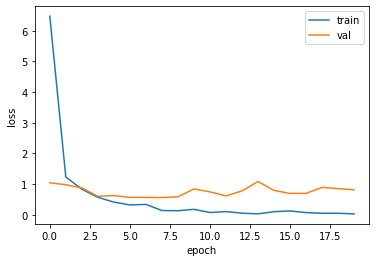

In [44]:
# 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

plt.show()

In [45]:
model.evaluate(val_input, val_target)

1/1 [==============================] - 1s 1s/step - loss: 0.8124 - accuracy: 0.7586


[0.8123809099197388, 0.7586206793785095]

In [46]:
model.evaluate(test_input, test_target)

2/2 [==============================] - 2s 231ms/step - loss: 1.2074 - accuracy: 0.8889


[1.2074471712112427, 0.8888888955116272]

In [51]:
test = np.array(Image.open('../data/cnn/test.jpg').resize((350,350),Image.LANCZOS), dtype=np.int32)

In [52]:
test.shape

(350, 350)

In [54]:
pred = model.predict(test.reshape(-1,350,350))

1/1 [==============================] - 0s 216ms/step


In [55]:
classes = ['의자','노트북','피아노']
print(classes[np.argmax(pred)])

노트북
